In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

# Povežemo Google Disk
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Definiramo pot do datoteke
file_path = '/content/drive/MyDrive/Smelavc.rpt'

# Določimo specifikacije stolpcev
colspecs = [
    (0, 30),       # Datum
    (31, 31 + 38), # Temperatura zraka
    (70, 109)      # Temperatura ceste
]

# Določimo imena stolpcev
column_names = ['Datum', 'T zraka', 'T ceste']

# Branje podatkov iz datoteke s fiksno širino
df_rk = pd.read_fwf(
    file_path,
    colspecs=colspecs,
    skiprows=2,          # Preskočimo prve dve vrstici
    names=column_names,
    decimal=',',         # Nastavimo decimalno ločilo na vejico
)

# Pretvorimo datum v datetime objekt
df_rk['Datum'] = pd.to_datetime(df_rk['Datum'], format='%Y-%m-%d %H:%M')

# Nastavimo 'datum' kot indeks podatkovnega okvira
df_rk.set_index('Datum', inplace=True)

# Prikaz prvih nekaj vrstic podatkovnega okvira za pregled
print(df_rk.head())

                     T zraka  T ceste
Datum                                
2009-01-01 00:05:00     -0.4     -2.5
2009-01-01 00:08:00     -0.3     -2.5
2009-01-01 00:17:00      0.0     -2.4
2009-01-01 00:23:00      0.0     -2.3
2009-01-01 00:30:00     -0.1     -1.7


In [ ]:
with open('/content/drive/MyDrive/Smelavc.rpt', 'r') as f:
    for i in range(0,10):
      print(f.readline(),end='')

﻿Čas meritve v GMT časovnem pasu T zraka                                 T ceste
------------------------------- --------------------------------------- ---------------------------------------
2009-01-01 00:05                -0,40000                                -2,50000
2009-01-01 00:08                -0,30000                                -2,50000
2009-01-01 00:17                0,00000                                 -2,40000
2009-01-01 00:23                0,00000                                 -2,30000
2009-01-01 00:30                -0,10000                                -1,70000
2009-01-01 00:35                0,10000                                 -1,50000
2009-01-01 00:41                -0,10000                                -1,60000
2009-01-01 00:46                0,10000                                 -2,70000


<Axes: xlabel='Datum'>

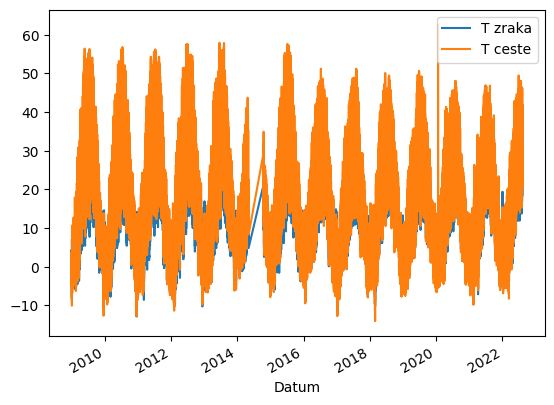

In [3]:
df_rk.plot()

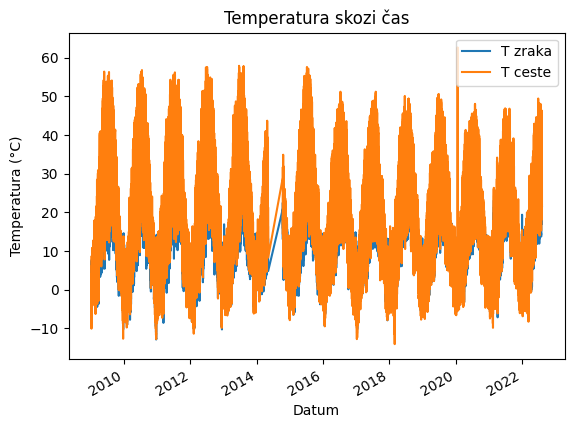

In [4]:
# Nardimo graf
df_rk.plot()

# Dodamo naslov in oznake osi
plt.title('Temperatura skozi čas')
plt.xlabel('Datum')
plt.ylabel('Temperatura (°C)')

# Nardimo graf
plt.show()

<Figure size 1400x800 with 0 Axes>

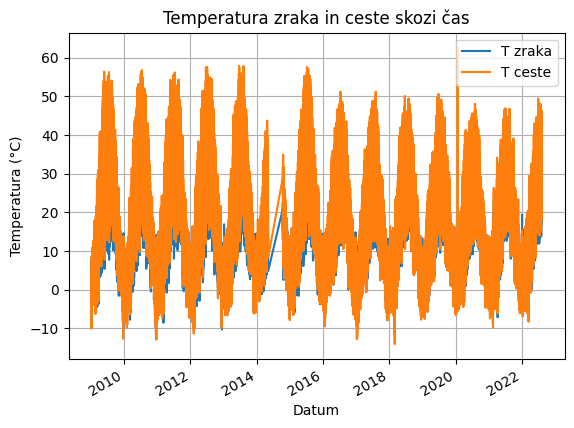

In [ ]:
plt.figure(figsize=(14, 8))  # Določite velikost grafa

# Ustvarimo graf s podatki iz df_rk
df_rk[['T zraka', 'T ceste']].plot()

# Dodamo naslov in oznake osi
plt.title('Temperatura zraka in ceste skozi čas')
plt.xlabel('Datum')
plt.ylabel('Temperatura (°C)')

# Dodamo mrežo za boljšo berljivost
plt.grid()

# Prikažemo graf
plt.show()

<Figure size 1400x800 with 0 Axes>

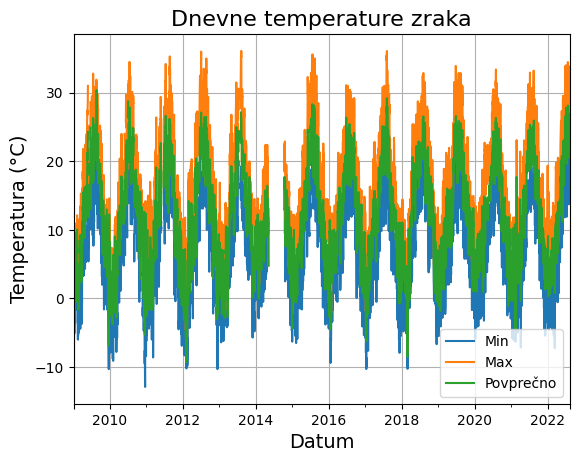

In [ ]:
#  Nardimo prazno DataFrame za shranjevanje dnevnih stat. podatkov
df_rezultati = pd.DataFrame()

# Računanje dnevnih stat. podatkov

# Dnevni minimum
df_rezultati['Min'] = df_rk.resample('D').min()['T zraka']
# Dnevni maksimum
df_rezultati['Max'] = df_rk.resample('D').max()['T zraka']
# Dnevno povprečje
df_rezultati['Povprečje'] = df_rk.resample('D').mean()['T zraka']

# Nardimo graf
plt.figure(figsize=(14, 8))  # Nastavimo širino in višino grafa

# Risanje dnevnih statističnih podatkov
df_rezultati.plot()

# 5. Dodajanje naslovov in oznak
plt.title('Dnevne temperature zraka', fontsize=16)  # Naslov grafa
plt.xlabel('Datum', fontsize=14)  # Oznaka osi x
plt.ylabel('Temperatura (°C)', fontsize=14)  # Oznaka osi y

# 6. Dodajanje mreže za boljšo berljivost
plt.grid()

# 7. Dodajanje legende za razločevanje med vrsticami
plt.legend(['Min', 'Max', 'Povprečno'])

# 8. Prikaz grafa
plt.show()

In [ ]:
# 3. Računanje dnevnih statističnih podatkov
df_rezultati['minimum'] = df_rk.resample('D').min()['T zraka']
df_rezultati['maximum'] = df_rk.resample('D').max()['T zraka']
df_rezultati['povprecno'] = df_rk.resample('D').mean()['T zraka']

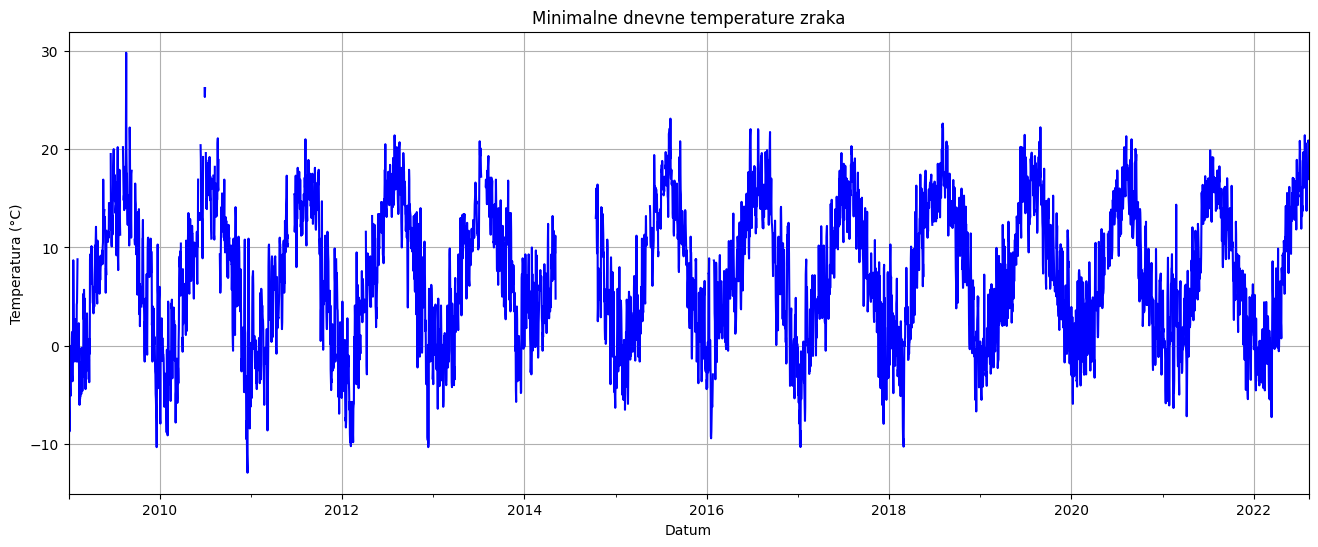

In [ ]:
# Graf za minimum
plt.figure(figsize=(16, 6))  # Velikost grafa
df_rezultati['minimum'].plot(color='blue', title='Minimalne dnevne temperature zraka', ylabel='Temperatura (°C)', xlabel='Datum')
plt.grid()
plt.show()

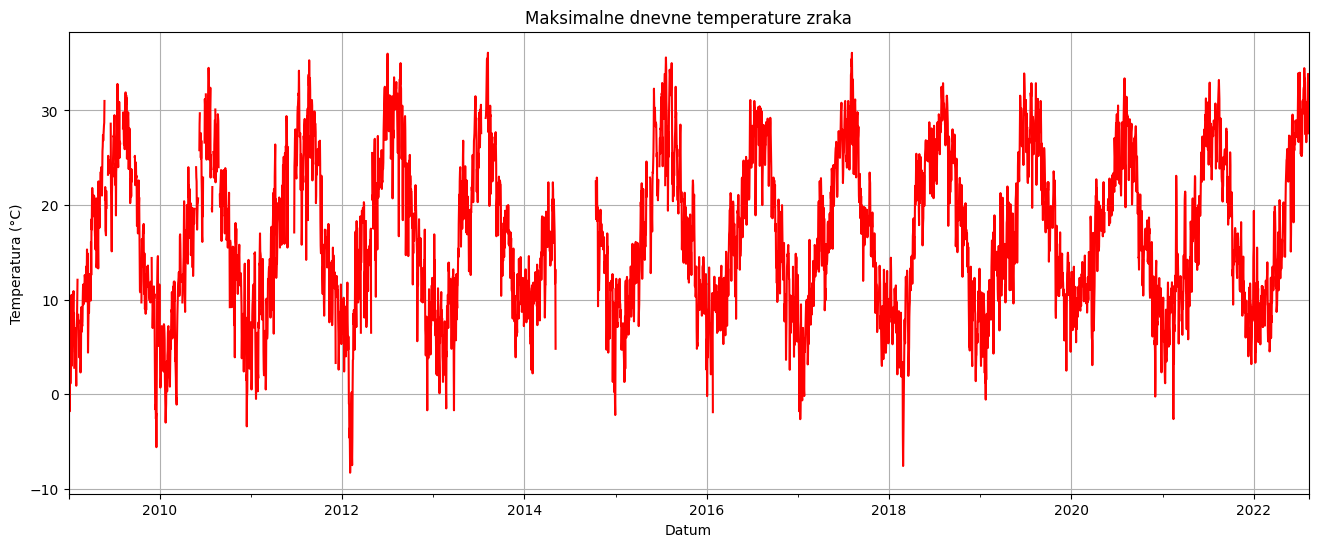

In [ ]:
# Graf za maksimum
plt.figure(figsize=(16, 6))  # Velikost grafa
df_rezultati['maximum'].plot(color='red', title='Maksimalne dnevne temperature zraka', ylabel='Temperatura (°C)', xlabel='Datum')
plt.grid()
plt.show()

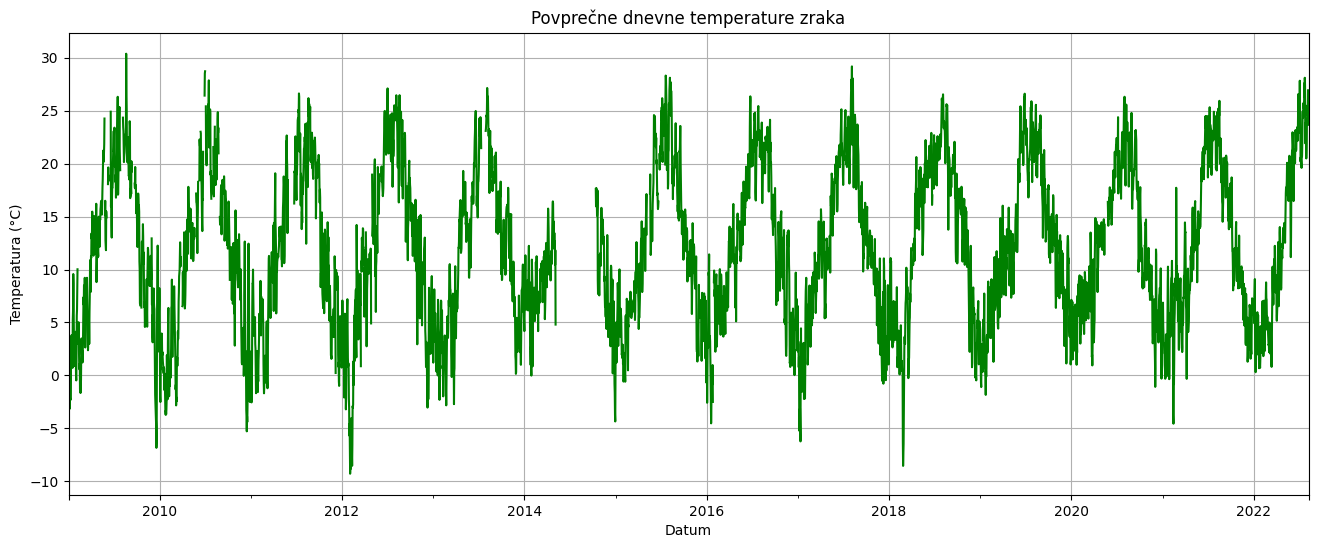

In [ ]:
# Graf za povprečje
plt.figure(figsize=(16, 6))  # Velikost grafa
df_rezultati['povprecno'].plot(color='green', title='Povprečne dnevne temperature zraka', ylabel='Temperatura (°C)', xlabel='Datum')
plt.grid()
plt.show()

<Figure size 1600x600 with 0 Axes>

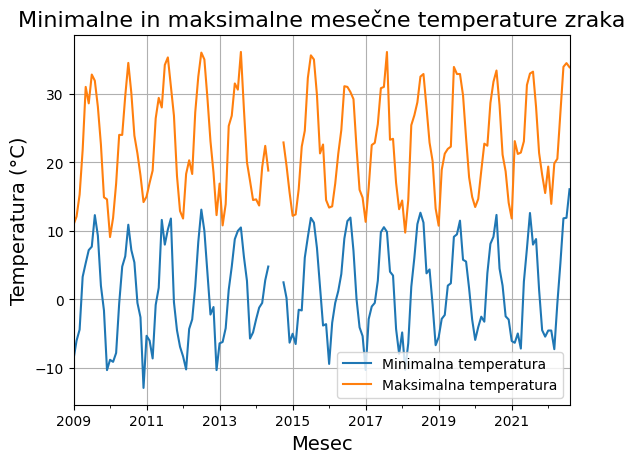

In [ ]:
# Nardimo prazno DataFrame za shranjevanje mesečnih statističnih podatkov
df_mesečni_rezultati = pd.DataFrame()

# Računanje mesečnih statističnih podatkov

# Mesečni minimum
df_mesečni_rezultati['minimalna'] = df_rk.resample('M').min()['T zraka']
# Mesečni maksimum
df_mesečni_rezultati['maksimalna'] = df_rk.resample('M').max()['T zraka']

# Ustvarjanje grafa za minimalne in maksimalne mesečne temperature
plt.figure(figsize=(16, 6))  # Velikost grafa

# Risanje minimalnih in maksimalnih temperatur
df_mesečni_rezultati.plot()

# Dodajanje naslovov in oznak
plt.title('Minimalne in maksimalne mesečne temperature zraka', fontsize=16)  # Naslov grafa
plt.xlabel('Mesec', fontsize=14)  # Oznaka osi x
plt.ylabel('Temperatura (°C)', fontsize=14)  # Oznaka osi y

# Dodajanje mreže za boljšo berljivost
plt.grid()

# Dodajanje legende
plt.legend(['Minimalna temperatura', 'Maksimalna temperatura'])

# Prikaz grafa
plt.show()

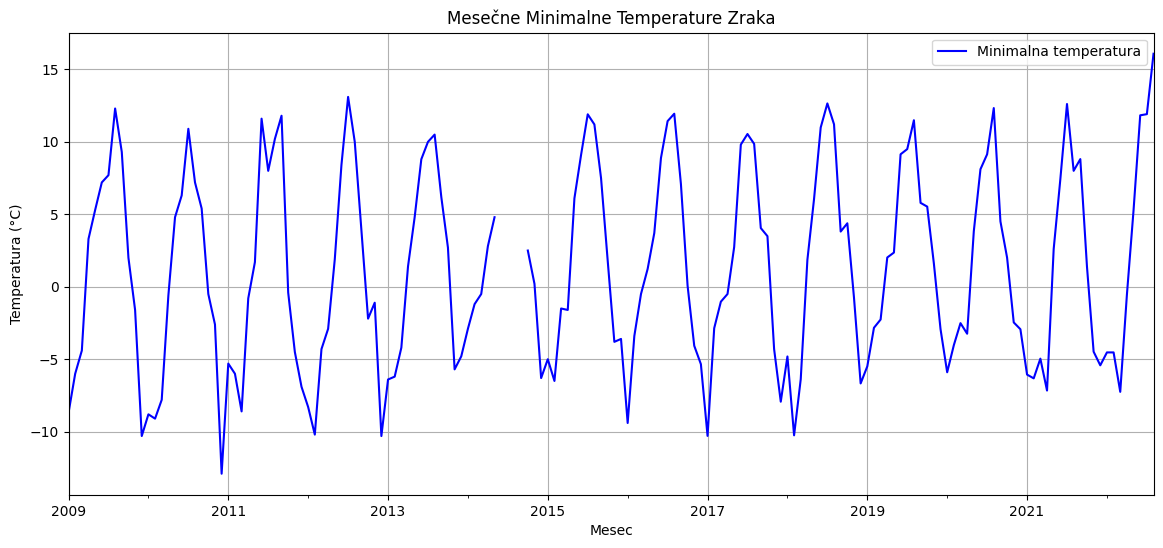

In [ ]:
# Nardimo graf za mesečne minimalne temperature
plt.figure(figsize=(14, 6))  # Velikost grafa
df_mesečni_rezultati['minimalna'].plot(color='blue', title='Mesečne Minimalne Temperature Zraka', ylabel='Temperatura (°C)', xlabel='Mesec')
plt.grid()
plt.legend(['Minimalna temperatura'])
plt.show()

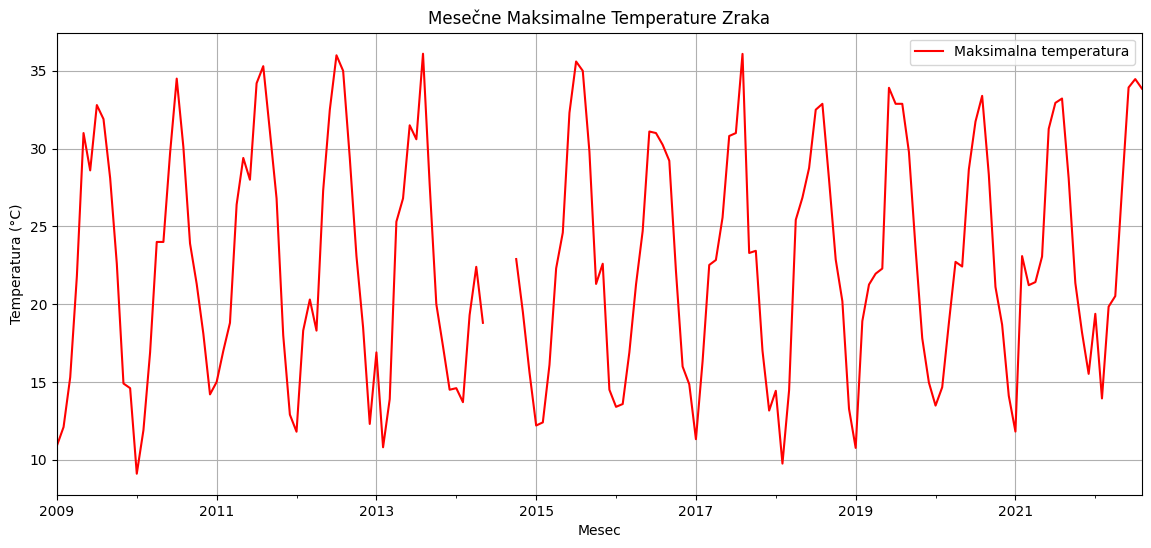

In [ ]:
# Nardimo graf za mesečne maksimalne temperature
plt.figure(figsize=(14, 6))  # Velikost grafa
df_mesečni_rezultati['maksimalna'].plot(color='red', title='Mesečne Maksimalne Temperature Zraka', ylabel='Temperatura (°C)', xlabel='Mesec')
plt.grid()
plt.legend(['Maksimalna temperatura'])
plt.show()

In [ ]:
warmest_tzraka = df_rk['T zraka'].nlargest(10)
coldest_tzraka = df_rk['T zraka'].nsmallest(10)

# Create a DataFrame for the results
result_df = pd.DataFrame({
    'Najtoplejše meritve': warmest_tzraka,
    'Najhladnejše meritve': coldest_tzraka
})

# Display the table
result_df

,Najtoplejše meritve,Najhladnejše meritve
Datum,,
2010-12-19 02:05:00,NaN,-12.6
2010-12-19 02:10:00,NaN,-12.6
2010-12-19 02:35:00,NaN,-12.6
2010-12-19 02:55:00,NaN,-12.7
2010-12-19 03:00:00,NaN,-12.7
2010-12-19 03:05:00,NaN,-12.9
2010-12-19 03:12:00,NaN,-12.7
2010-12-19 03:16:00,NaN,-12.6
2010-12-19 03:25:00,NaN,-12.7


In [ ]:
# Pridobitev 10 najtoplejših dni
najtoplejše_meritve = df_rk['T zraka'].nlargest(10)

# Pridobitev 10 najhladnejših dni
najhladnejše_meritve = df_rk['T zraka'].nsmallest(10)

# Ustvarjanje DataFrame za najtoplejše meritve
rezultati_najtoplejše = pd.DataFrame({
    'Datum': najtoplejše_meritve.index,  # Indeksi (datumi) najtoplejših dni
    'Temperatura (T zraka)': najtoplejše_meritve.values  # Temperatura najtoplejših dni
})

# Ustvarjanje DataFrame za najhladnejše meritve
rezultati_najhladnejše = pd.DataFrame({
    'Datum': najhladnejše_meritve.index,  # Indeksi (datumi) najhladnejših dni
    'Temperatura (T zraka)': najhladnejše_meritve.values  # Temperatura najhladnejših dni
})

# Prikaz rezultatov za najtoplejše meritve
print("Najtoplejše meritve:")
print(rezultati_najtoplejše)

# Prikaz rezultatov za najhladnejše meritve
print("\nNajhladnejše meritve:")
print(rezultati_najhladnejše)

Najtoplejše meritve:
                Datum  Temperatura (T zraka)
0 2013-08-08 11:18:00                  36.10
1 2017-08-05 10:50:00                  36.09
2 2017-08-05 11:00:00                  36.09
3 2012-07-02 10:58:00                  36.00
4 2013-08-08 11:13:00                  36.00
5 2017-08-05 11:15:00                  35.90
6 2017-08-05 10:45:00                  35.81
7 2017-08-05 11:25:00                  35.81
8 2012-07-02 10:37:00                  35.80
9 2013-08-08 11:04:00                  35.80

Najhladnejše meritve:
                Datum  Temperatura (T zraka)
0 2010-12-19 03:05:00                  -12.9
1 2010-12-19 02:55:00                  -12.7
2 2010-12-19 03:00:00                  -12.7
3 2010-12-19 03:12:00                  -12.7
4 2010-12-19 03:25:00                  -12.7
5 2010-12-19 03:52:00                  -12.7
6 2010-12-19 02:05:00                  -12.6
7 2010-12-19 02:10:00                  -12.6
8 2010-12-19 02:35:00                  -12.6
9 2010-12-1

In [ ]:
# Pridobitev 10 najtoplejših dni
najtoplejše_meritve = df_rk['T zraka'].nlargest(10)

# Pridobitev 10 najhladnejših dni
najhladnejše_meritve = df_rk['T zraka'].nsmallest(10)

# Ustvarjanje DataFrame za najtoplejše meritve in ponastavitev indeksa
rezultati_najtoplejše = pd.DataFrame({
    'Datum': najtoplejše_meritve.index,  # Indeksi (datumi) najtoplejših dni
    'Temperatura (T zraka)': najtoplejše_meritve.astype(str) + " °C"  # Dodaj °C k vsaki temperaturi
}).reset_index(drop=True)  # Ponastavi indeks, da prepreči podvajanje datuma

# Ustvarjanje DataFrame za najhladnejše meritve in ponastavitev indeksa
rezultati_najhladnejše = pd.DataFrame({
    'Datum': najhladnejše_meritve.index,  # Indeksi (datumi) najhladnejših dni
    'Temperatura (T zraka)': najhladnejše_meritve.astype(str) + " °C"  # Dodaj °C k vsaki temperaturi
}).reset_index(drop=True)  # Ponastavi indeks, da prepreči podvajanje datuma

# Prikaz rezultatov za najtoplejše meritve
print("Najtoplejše meritve:")
print(rezultati_najtoplejše)

# Prikaz rezultatov za najhladnejše meritve
print("\nNajhladnejše meritve:")
print(rezultati_najhladnejše)


Najtoplejše meritve:
                Datum Temperatura (T zraka)
0 2013-08-08 11:18:00               36.1 °C
1 2017-08-05 10:50:00              36.09 °C
2 2017-08-05 11:00:00              36.09 °C
3 2012-07-02 10:58:00               36.0 °C
4 2013-08-08 11:13:00               36.0 °C
5 2017-08-05 11:15:00               35.9 °C
6 2017-08-05 10:45:00              35.81 °C
7 2017-08-05 11:25:00              35.81 °C
8 2012-07-02 10:37:00               35.8 °C
9 2013-08-08 11:04:00               35.8 °C

Najhladnejše meritve:
                Datum Temperatura (T zraka)
0 2010-12-19 03:05:00              -12.9 °C
1 2010-12-19 02:55:00              -12.7 °C
2 2010-12-19 03:00:00              -12.7 °C
3 2010-12-19 03:12:00              -12.7 °C
4 2010-12-19 03:25:00              -12.7 °C
5 2010-12-19 03:52:00              -12.7 °C
6 2010-12-19 02:05:00              -12.6 °C
7 2010-12-19 02:10:00              -12.6 °C
8 2010-12-19 02:35:00              -12.6 °C
9 2010-12-19 03:16:00           